# 📘 Customer Churn Analysis Using Python (EDA)


---

## 🧠 **Objective:**

The objective of this project is to analyze customer churn patterns and discover the key factors that influence customer retention. The analysis will be conducted using Python and exploratory data analysis (EDA) techniques.
The focus will be on variables such as customer tenure, payment methods, contract types, monthly charges, and demographic attributes to determine which factors are most strongly associated with higher churn rates.

---

## 📂 Dataset Info:
- Source: [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- Format: CSV
- Target Column: `Churn` (Yes/No)

---
## 📌 Steps in This Notebook:

1. Import Libraries & Dataset
2. Initial Data Exploration
3. Data Cleaning
4. Univariate Analysis
5. Bivariate Analysis
6. Correlation Analysis
7. Key Insights & Recommendations


### 📥 Dataset Import Using Kaggle API

To ensure reproducibility and avoid manual uploads, the dataset is imported using the official Kaggle API. This also allows the analysis to be version-controlled and automated in future pipelines.

Steps:
- Download API key from Kaggle (kaggle.json)
- Authenticate using Kaggle CLI
- Download and unzip the dataset


In [ ]:
# ================================
# 📥 KAGGLE API SETUP
# ================================
from google.colab import files
files.upload()  # Upload kaggle.json here (from your Kaggle account)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ================================
# 🔽 DOWNLOAD & UNZIP DATASET
# ================================
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 297MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")


In [ ]:
# EDA copy for visualizations
df_viz = df.copy()

# Model-ready version
df_ml = df.copy()


In [ ]:
df.to_csv("raw_data.csv")
from google.colab import files
files.download("raw_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_viz.shape

(7043, 21)

In [ ]:
df_viz.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_viz.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df_viz.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🛠 Data Cleaning & Transformation
###  Handle Missing Values

In [ ]:
df_viz.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df_viz.duplicated().sum()

np.int64(0)

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in binary_cols:
    df_ml[col] = df_ml[col].astype(str).str.strip().str.lower()
    df_ml[col] = df_ml[col].map({'yes': 1, 'no': 0, 'male': 1, 'female': 0}).fillna(0).astype(int)


In [ ]:
df_ml.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3072,9500-IWPXQ,0,0,1,1,61,1,1,1,1,...,4820.55,0,True,False,False,True,False,False,True,False


In [ ]:
##Check for empty string ' ' or whitespace
df_viz[df_viz['TotalCharges'].str.strip() == '']
df_ml[df_ml['TotalCharges'].str.strip() == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,No,DSL,1,...,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,Yes,No,0,...,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,Yes,No,0,...,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,No,No,0,...,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,No,No,0,...,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,Yes,DSL,0,...,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [ ]:
# Clean and convert 'TotalCharges'
df_ml['TotalCharges'] = df_ml['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
df_ml['TotalCharges'] = pd.to_numeric(df_ml['TotalCharges'], errors='coerce')

In [ ]:
# Clean and convert 'TotalCharges'
df_viz['TotalCharges'] = df_viz['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
df_viz['TotalCharges'] = pd.to_numeric(df_viz['TotalCharges'], errors='coerce')

In [ ]:
# Handle missing values
missing_count = df_viz['TotalCharges'].isna().sum()
print(f"Missing TotalCharges: {missing_count}")

Missing TotalCharges: 11


In [ ]:
#  Droping rows (Because its very few)
df_viz.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
#  Droping rows (Because its very few)
df_ml.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
# Check dtype
print(df_viz['TotalCharges'].dtype)

float64


In [ ]:
df_viz.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_ml.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
multi_class_cols = [
    'MultipleLines',
    'InternetService',
    'Contract',
    'PaymentMethod'
]

df_viz['MultipleLines'] = df_viz['MultipleLines'].replace({'No phone service': 'No'})
df_ml['MultipleLines'] = df_ml['MultipleLines'].replace({'No phone service': 'No'})


df_ml = pd.get_dummies(df_ml, columns=multi_class_cols, drop_first=True)



In [ ]:
for col in df_ml.columns:
    if df_ml[col].dtype == bool:
        df_ml[col] = df_ml[col].astype(int)

In [ ]:
# Step 1: Replace noisy values
#df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Step 3: One-Hot Encode All Cleaned Categorical Columns
#category_columns = ['gender','MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
#df = pd.get_dummies(df, columns=category_columns, drop_first=True)


In [ ]:
df_ml.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,29.85,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,1889.50,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,108.15,1,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,1840.75,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,151.65,1,0,1,0,0,0,0,1,0


In [ ]:
df_viz.to_csv("cleaned_data_Viz.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_data_Viz.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ml.to_csv("cleaned_data_ml.csv", index=False)
from google.colab import files
files.download("cleaned_data_ml.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_pickle("raw_data.pkl")
df_viz.to_pickle("cleaned_data_Viz.pkl")
df_ml.to_pickle("cleaned_data_ml.pkl")



---



---



# **Data Visualization**


---



In [14]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_Viz.csv to cleaned_data_Viz.csv


In [16]:
df_viz = pd.read_csv("cleaned_data_Viz.csv")
df_viz.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


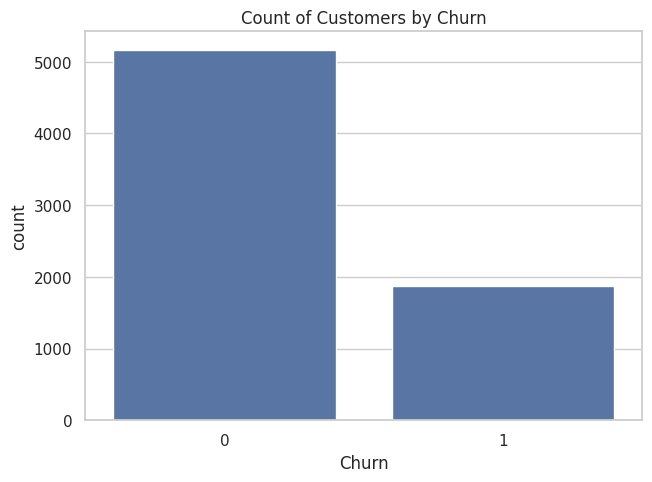

In [ ]:
df['Churn'].value_counts()
sns.countplot(data=df, x='Churn')
plt.title("Count of Customers by Churn")
plt.show()

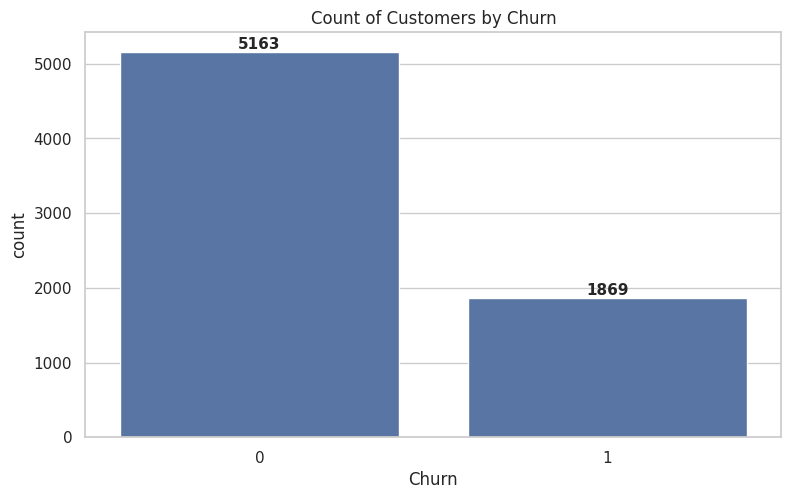

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Churn')

# Title
plt.title("Count of Customers by Churn")

# Adding count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

/tmp/ipython-input-106-1829280425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=custom_palette, ax=ax)


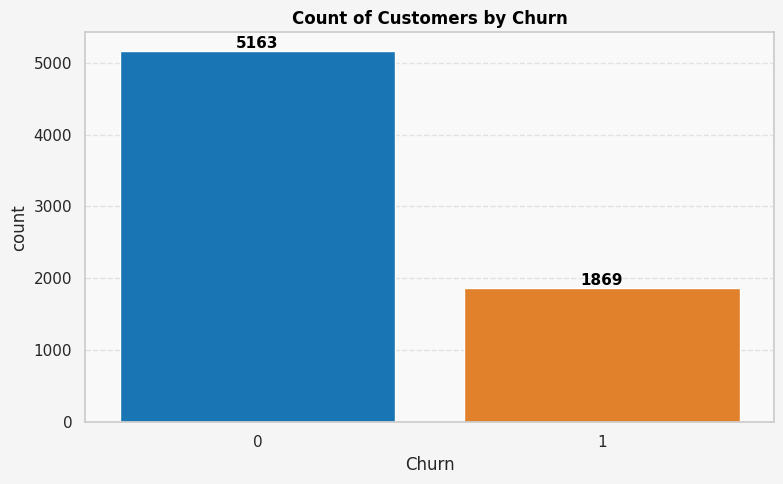

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
custom_palette = ['#007acc', '#ff7f0e']
sns.countplot(data=df, x='Churn', palette=custom_palette, ax=ax)

ax.set_title("Count of Customers by Churn", fontsize=12, weight='bold', color='black')

# Bar Label Fix: Loop through all containers
for container in ax.containers:
    ax.bar_label(container, fontsize=11, weight='bold', color='black')

# Styling
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()




/tmp/ipython-input-107-3028332450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=custom_palette, ax=ax)


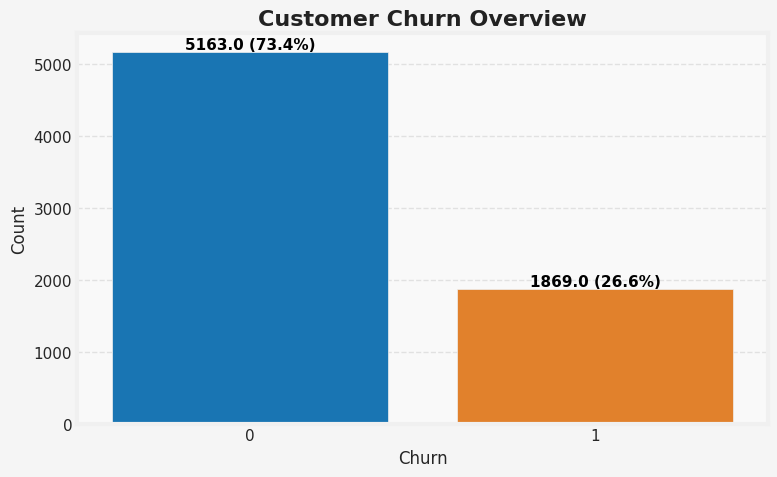

In [ ]:
# Set style
plt.style.use('fivethirtyeight')

# Total customers
total = len(df)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# 🔥 Correct usage: Only x, no hue needed
custom_palette = ['#007acc', '#ff7f0e']
sns.countplot(data=df, x='Churn', palette=custom_palette, ax=ax)

# Title and axis labels
ax.set_title("Customer Churn Overview", fontsize=16, fontweight='bold', color='#222222')
ax.set_xlabel("Churn", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# ✅ Annotate counts and percentages
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        percent = f"{(height/total)*100:.1f}%"
        label = f"{height} ({percent})"
        ax.text(bar.get_x() + bar.get_width()/2, height/2,
                label, ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')
    else:
        print("⚠️ Warning: One of the bars has height=0 or was skipped.")

# Styling
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()

<Axes: xlabel='TotalCharges', ylabel='Count'>

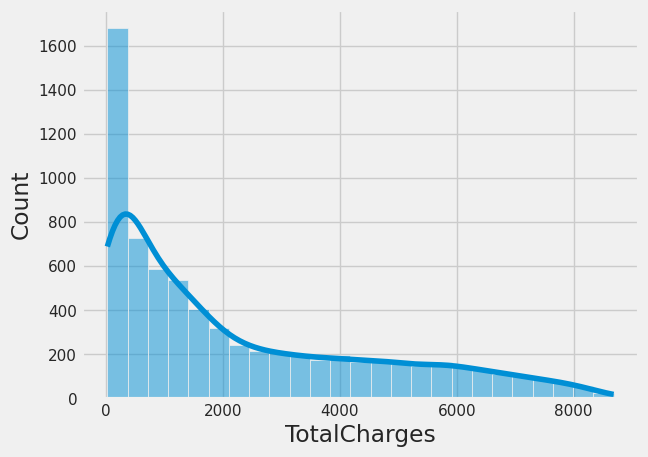

In [ ]:
sns.histplot(df['TotalCharges'], kde=True)

<Axes: xlabel='Partner', ylabel='count'>

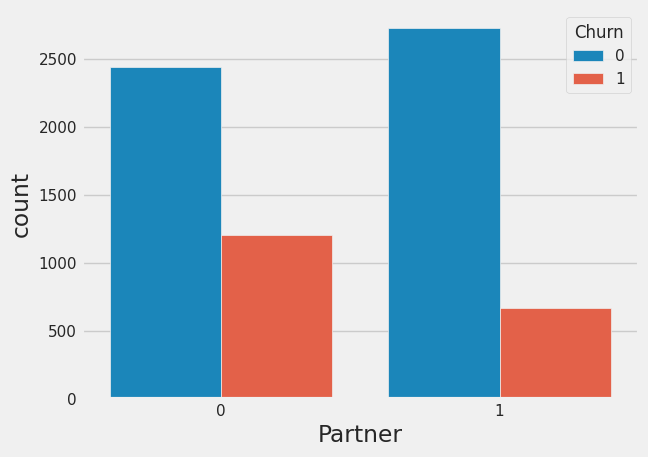

In [ ]:
sns.countplot(data=df, x='Partner',hue='Churn')

<Axes: xlabel='gender', ylabel='count'>

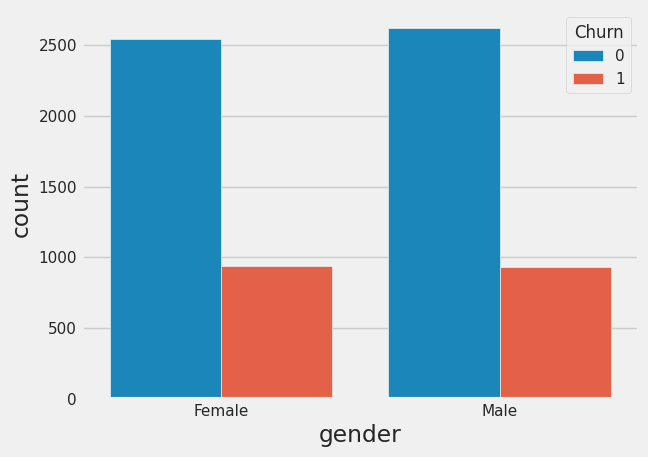

In [ ]:
sns.countplot(data=df, x='gender',hue='Churn')